In [1]:
#Import libraries
from keras.datasets import imdb

from keras import models
from keras import layers

import numpy as np

import matplotlib.pyplot as plt

# don't show logs

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-11-13 19:47:15.017092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 19:47:15.753969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/lib/x86_64-linux-gnu/:/usr/local/cuda-11/targets/x86_64-linux/lib/:/opt/oracle:/opt/oracle/lib/:
2023-11-13 19:47:15.754018: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-13 19:47:15.845157: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable

In [2]:
# Load data

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
# Small discovery

print(train_data[0])

print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

reverse_word_index[1]

'the'

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-11-13 19:47:39.216209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/lib/x86_64-linux-gnu/:/usr/local/cuda-11/targets/x86_64-linux/lib/:/opt/oracle:/opt/oracle/lib/:
2023-11-13 19:47:39.216753: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-13 19:47:39.216785: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (killuamam-KLVL-WXX9): /proc/driver/nvidia/version does not exist
2023-11-13 19:47:39.217805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable th

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5083 - acc: 0.7916 - val_loss: 0.3790 - val_acc: 0.8733
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3005 - acc: 0.9022 - val_loss: 0.2992 - val_acc: 0.8890
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2199 - acc: 0.9289 - val_loss: 0.2783 - val_acc: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1729 - acc: 0.9431 - val_loss: 0.2836 - val_acc: 0.8866
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1395 - acc: 0.9565 - val_loss: 0.2837 - val_acc: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3018 - val_acc: 0.8813
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0974 - acc: 0.9707 - val_loss: 0.3085 - val_acc: 0.8853
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0781 - a

In [9]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

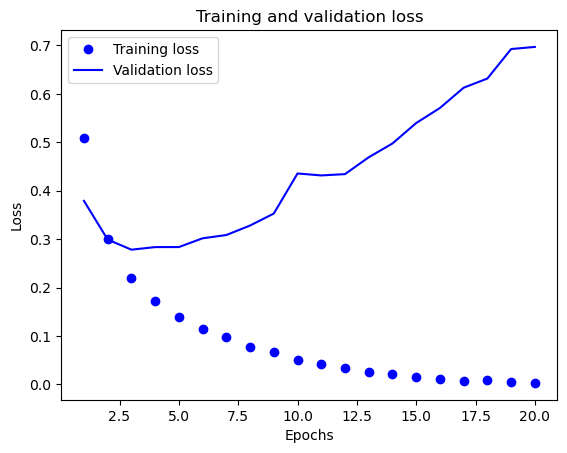

In [10]:
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

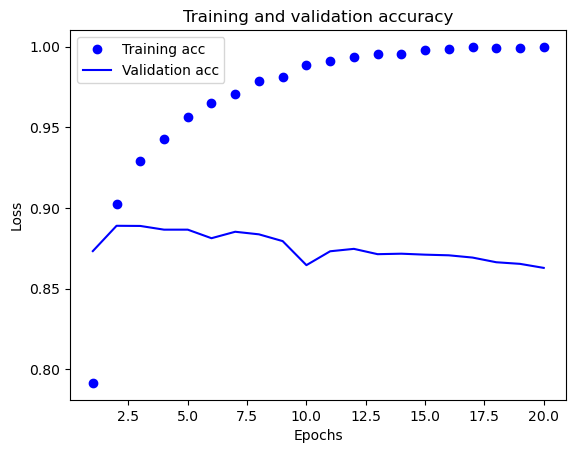

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This is a good example that show the overfitting problem. In the graphs below we see that - as expected the training loss keeps decreasing epoch after epoch, but the validation loss starts to increase after 4 epochs , in the other hand the training accuracy keeps increasing but the validation accuracy starts to decrease after 4 epochs. This can tell us that 4 epochs is a good number of epochs to train the model.


In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2023-11-13 19:48:08.052309: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 1s 11ms/step - loss: 0.4547 - accuracy: 0.8218
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2583 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1970 - accuracy: 0.9284
Epoch 4/4
  1/782 [..............................] - ETA: 1:33 - loss: 0.3774 - accuracy: 0.8125

2023-11-13 19:48:11.674815: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8680


In [13]:
results

[0.33694860339164734, 0.8679599761962891]

We can then achieve an accuracy of 88% on the test set.

**Note:**
This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%